In [1]:
from utils_v1 import *

from icecream import ic
import pdb
from sklearn import metrics
import importlib
import utils_v1
import pathlib
import cv2
import sys
import numpy as np
from src import metrics as _metrics
from src.dataset import (
    DeforestationTime, MultipleDates,
    PA, PADeforestationTime, PADistanceMap, PAMultipleDates, 
    MT, MTDeforestationTime, MTMultipleDates
)
from src import training_generator as generator
from src.patchesHandler import PatchesHandler, PatchesHandlerMultipleDates
import matplotlib.pyplot as plt
import matplotlib

from tifffile import imsave
import src.rasterTools as rasterTools


In [2]:
training = False
save_probabilities = False
loadInference = False


addPastDeforestationInput = True
'''
if training == True:
	dates = [2017, 2018]
else:
	dates = [2018, 2019]
if training == True:
	dates = [2018, 2019]
else:
	dates = [2019, 2020]
'''
dates = [2018, 2019]
dataset = PAMultipleDates(dates = dates, # dates = [2017, 2018, 2019]. [2018, 2019]. [2015, 2016, 2017, 2018]
	addPastDeforestationInput = addPastDeforestationInput,
	borderBuffer = 2)	
# dates = [2019, 2020]
# dataset = MTMultipleDates(dates = dates, # dates = [2016,2017,2018,2019]
# 	addPastDeforestationInput = addPastDeforestationInput,
# 	borderBuffer = 2)	

if issubclass(type(dataset), MultipleDates):
	patchesHandler = PatchesHandlerMultipleDates(
		dataset)
else:
	patchesHandler = PatchesHandler()

inference_times = 10


if training == False:


	if type(dataset) == PAMultipleDates:
		# exp_ids = [103, 104, 105, 106, 107, 118, 119, 120, 121, 122] # same date
		exp_ids = [123, 124, 125, 126, 127, 128, 129, 131, 1122, 1121] # earlier date
		threshold_uncertainty = 0.1476584111529534

	if type(dataset) == MTMultipleDates:
		# exp_ids = [108, 109, 110, 111, 112, 113, 114, 115, 116, 117] # same date
		exp_ids = [130, 132, 133, 134, 135, 136, 137, 1125, 1124, 1123] # earlier date
		threshold_uncertainty = 0.1722648842106805

else:
	# exp = 13 # Multiple dates. using fixed fixed past deforestation distance
	exp = 140

ic| list(self.date_ids): [0]
ic| self.image_channels: [[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]]
ic| self.input_image_shape: 21
ic| self.dataset.image_channels: [[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]]


In [3]:
threshold_uncertainty

0.1476584111529534

In [4]:
# exp

In [5]:
# Loading reference
label_mask = dataset.loadLabel()
print('Mask label shape: ', '\n', label_mask.shape, '\n', 'Unique values: ', '\n', np.unique(label_mask))

D:/Jorge/datasets/deforestation/Para/deforestation_past_years.tif
Loaded deforestation past years


ic| np.unique(deforestation_past_years, return_counts=True): (array([   0, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
                                                                    2018, 2019, 2020, 2021], dtype=uint16),
                                                              array([132185553,   3150503,   4571354,    864429,    903608,   1299506,
                                                                      2477971,   1561686,   1459696,    969060,    644976,   2209014,
                                                                      2100204,   5257014,   3514616], dtype=int64))


Label where deforestation past years is actual date (2019) = 1


ic| np.unique(deforestation_past_years, return_counts=True): (array([   0, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
                                                                    2018, 2019, 2020, 2021], dtype=uint16),
                                                              array([132185553,   3150503,   4571354,    864429,    903608,   1299506,
                                                                      2477971,   1561686,   1459696,    969060,    644976,   2209014,
                                                                      2100204,   5257014,   3514616], dtype=int64))


Past deforestation different from 0 (no deforestation)


ic| np.unique(deforestation_past_years, return_counts=True): (array([   0, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
                                                                    2018, 2019, 2020, 2021], dtype=uint16),
                                                              array([132185553,   3150503,   4571354,    864429,    903608,   1299506,
                                                                      2477971,   1561686,   1459696,    969060,    644976,   2209014,
                                                                      2100204,   5257014,   3514616], dtype=int64))


Past deforestation before 2008 is 2
D:/Jorge/datasets/deforestation/deforestation_before_2008/deforestation_before_2008_para.tif


ic| np.unique(label_past_deforestation_before_2008, return_counts=True): (array([  0, 215], dtype=uint8), array([124211220,  38957970], dtype=int64))
ic| np.unique(deforestation_past_years, return_counts=True): (array([   0, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
                                                                    2018, 2019, 2020, 2021], dtype=uint16),
                                                              array([132185553,   3150503,   4571354,    864429,    903608,   1299506,
                                                                      2477971,   1561686,   1459696,    969060,    644976,   2209014,
                                                                      2100204,   5257014,   3514616], dtype=int64))
ic| label_per_date.shape: (17730, 9203, 1)


Mask label shape:  
 (17730, 9203, 1) 
 Unique values:  
 [0 1 2]


(-0.5, 9202.5, 17729.5, -0.5)

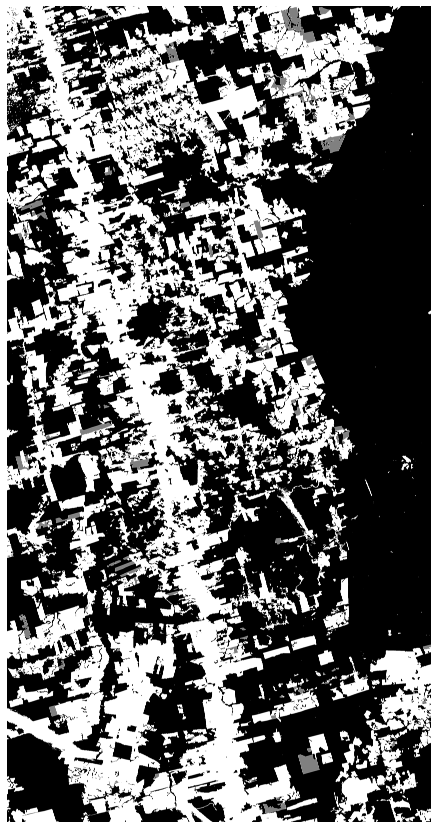

In [6]:
plt.figure(figsize=(15,15))
plt.imshow(label_mask, cmap=plt.cm.gray)
plt.axis('off')


In [7]:
# Creating tile mask

mask_tiles = create_mask(label_mask.shape[0], label_mask.shape[1], 
        grid_size=(dataset.grid_x, dataset.grid_y))
label_mask = label_mask[:mask_tiles.shape[0], :mask_tiles.shape[1]]

Tiles size:  3546 2300
Mask size:  (17730, 9200)


In [8]:
# Loading image stack
image_stack = dataset.loadInputImage()

print('Image shape: ', image_stack.shape)
channels = image_stack.shape[-1]
image_stack = image_stack[:mask_tiles.shape[0], :mask_tiles.shape[1],:]
print('mask: ',mask_tiles.shape)
print('image stack: ', image_stack.shape)
print('ref :', label_mask.shape)
#plt.imshow(mask_tiles)

ic| image_stack.shape: (17730, 9203, 21)


Image shape:  (17730, 9203, 21)
mask:  (17730, 9200)
image stack:  (17730, 9200, 21)
ref : (17730, 9200, 1)


In [9]:
ic(image_stack.shape)
channels = image_stack.shape[-1]
ic(channels)

ic| image_stack.shape: (17730, 9200, 21)
ic| channels: 21


21

In [10]:
mask_tr_val, mask_amazon_ts = dataset.getTrainValTestMasks(mask_tiles)


Training tiles:  [1, 3, 5, 8, 11, 13, 14, 20]
Validation tiles:  [6, 19]
Test tiles:  [2, 4, 7, 9, 10, 12, 15, 16, 17, 18]


In [11]:
# Creating folder for the experiment

'''
path_exp = dataset.paths.experiment + 'exp' + str(exp)
path_models = path_exp+'/models'
path_maps = path_exp+'/pred_maps'

if not os.path.exists(path_exp):
    os.makedirs(path_exp)   
if not os.path.exists(path_models):
    os.makedirs(path_models)   
if not os.path.exists(path_maps):
    os.makedirs(path_maps)
'''    
times = 1
method = 'resunet'
nb_filters = [16, 32, 64, 128, 256]
weights = [0.1, 0.9, 0]

In [12]:
if not issubclass(type(dataset), DeforestationTime):
    patchesHandler.dataset.image_channels[-1]

In [13]:
if issubclass(type(dataset), MultipleDates):
	channels = patchesHandler.input_image_shape
	image_stack = image_stack[..., patchesHandler.dataset.image_channels[-1]]
	label_mask = label_mask[...,-1]

In [14]:
channels

21

In [15]:
image_stack.shape

(17730, 9200, 21)

In [16]:
if issubclass(type(dataset), MultipleDates):
	channels = patchesHandler.input_image_shape
	# image_stack = image_stack[..., patchesHandler.dataset.image_channels[-1]]
	# label_mask = label_mask[...,-1]

In [17]:
#%% Test loop
times = 10

metrics_ts = []
n_pool = 3
n_rows = 5
n_cols = 4
rows, cols = image_stack.shape[:2]
pad_rows = rows - np.ceil(rows/(n_rows*2**n_pool))*n_rows*2**n_pool
pad_cols = cols - np.ceil(cols/(n_cols*2**n_pool))*n_cols*2**n_pool
print(pad_rows, pad_cols)

npad = ((0, int(abs(pad_rows))), (0, int(abs(pad_cols))), (0, 0))
image1_pad = np.pad(image_stack, pad_width=npad, mode='reflect')
image_stack


-30.0 -16.0


array([[[0.        , 0.27846956, 0.29306442, ..., 0.9999999 ,
         0.55555654, 0.733794  ],
        [0.08333334, 0.3109901 , 0.3349151 , ..., 0.9999999 ,
         0.5667715 , 0.7551435 ],
        [0.08333334, 0.41464937, 0.35584038, ..., 0.9999999 ,
         0.5667715 , 0.7551435 ],
        ...,
        [0.        , 0.02237022, 0.0868004 , ..., 0.5558951 ,
         0.10471493, 0.04218167],
        [0.        , 0.040663  , 0.07633775, ..., 0.5558951 ,
         0.10471493, 0.04218167],
        [0.        , 0.040663  , 0.07932711, ..., 0.4481398 ,
         0.07667753, 0.02251764]],

       [[0.        , 0.28863227, 0.29156977, ..., 0.9999999 ,
         0.5406033 , 0.69109493],
        [0.        , 0.29879498, 0.26466578, ..., 0.9999999 ,
         0.5577996 , 0.7264902 ],
        [0.08333334, 0.40042162, 0.3289364 , ..., 0.9999999 ,
         0.5577996 , 0.7264902 ],
        ...,
        [0.        , 0.06505346, 0.16302842, ..., 0.508574  ,
         0.09985512, 0.04723814],
        [0. 

In [18]:

h, w, c = image1_pad.shape
c = channels
patch_size_rows = h//n_rows
patch_size_cols = w//n_cols
num_patches_x = int(h/patch_size_rows)
num_patches_y = int(w/patch_size_cols)


class_n = 3

if loadInference == False:
    if save_probabilities == False:
        # prob_rec = np.zeros((image1_pad.shape[0],image1_pad.shape[1], class_n, inference_times), dtype = np.float32)
        prob_rec = np.zeros((image1_pad.shape[0],image1_pad.shape[1], inference_times), dtype = np.float32)

    new_model = utils_v1.build_resunet_dropout_spatial(input_shape=(patch_size_rows,patch_size_cols, c), 
        nb_filters = nb_filters, n_classes = class_n, dropout_seed = None, training = False)

    patchesHandler.class_n = class_n

    metrics_all =[]
    with tf.device('/cpu:0'):
        for tm in range(0,2):
            print('time: ', tm)
            
            # Recinstructing predicted map
            start_test = time.time()

            path_exp = dataset.paths.experiment + 'exp' + str(exp_ids[tm])
            path_models = path_exp + '/models'
            # ic(path_models+ '/' + method +'_'+str(0)+'.h5')
            model = load_model(path_models+ '/' + method +'_'+str(0)+'.h5', compile=False)
            for l in range(1, len(model.layers)):
                new_model.layers[l].set_weights(model.layers[l].get_weights())
            
            '''
            args_network = {'patch_size_rows': patch_size_rows,
                'patch_size_cols': patch_size_cols,
                'c': c,
                'nb_filters': nb_filters,
                'class_n': class_n,
                'dropout_seed': inference_times}
            '''
            prob_reconstructed = patchesHandler.infer(
                    new_model, image1_pad, h, w, 
                    # model, image1_pad, h, w, 
                    num_patches_x, num_patches_y, patch_size_rows, 
                    patch_size_cols)
                    # patch_size_cols, a = args_network)
                    
            ts_time =  time.time() - start_test

            if save_probabilities == True:
                np.save(path_maps+'/'+'prob_'+str(tm)+'.npy',prob_reconstructed) 
            else:
                prob_rec[:,:,tm] = prob_reconstructed
            
            metrics_all.append(ts_time)
            del prob_reconstructed
        metrics_ = np.asarray(metrics_all)
        # Saving test time
        np.save(path_exp+'/metrics_ts.npy', metrics_)


time:  0
time:  1


In [19]:
del image1_pad


In [20]:
# if loadInference == True:
if save_probabilities == True:
    prob_rec = np.zeros((h, w, times), dtype = np.float32)

    for tm in range (0, times):
        print(tm)
        prob_rec[:,:,tm] = np.load(path_maps+'/'+'prob_'+str(tm)+'.npy').astype(np.float32)

mean_prob = np.mean(prob_rec, axis = -1)



In [21]:
ic(mean_prob.shape)

ic| mean_prob.shape: (17760, 9216)


(17760, 9216)

In [22]:
label_mask.shape

(17730, 9200)

In [23]:
# Computing metrics over the test tiles
mean_prob = mean_prob[:label_mask.shape[0], :label_mask.shape[1]]

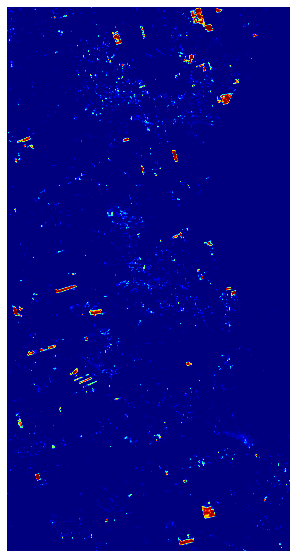

In [24]:
mean_prob = mean_prob.copy()
mean_prob[label_mask == 2] = 0
fig1 = plt.figure(figsize=(10,10))
plt.imshow(mean_prob, cmap = 'jet')
plt.axis('off')
plt.savefig('output/figures/Para prediction probability.png', dpi=150, bbox_inches='tight')

In [25]:
print(label_mask.shape)

(17730, 9200)


In [26]:
label_test = label_mask[mask_amazon_ts == 1]
mean_prob_test = mean_prob[mask_amazon_ts == 1]
mean_prob_test = mean_prob_test[label_test != 2]
label_test = label_test[label_test != 2]

print(label_test.shape)
print(np.unique(label_test, return_counts=True))

(54236371,)
(array([0, 1], dtype=uint8), array([53470765,   765606], dtype=int64))


In [27]:
from icecream import ic

ic(prob_rec.shape)
prob_rec = np.transpose(prob_rec, (2, 0, 1))


ic| prob_rec.shape: (17760, 9216, 10)


In [28]:
prob_rec = np.expand_dims(prob_rec, axis = -1)

In [29]:
ic(prob_rec.shape)

ic| prob_rec.shape: (10, 17760, 9216, 1)


(10, 17760, 9216, 1)

In [30]:
print(mean_prob.shape)

# threshold = 0.420339
threshold = 0.5

predicted = np.zeros_like(mean_prob)

predicted[mean_prob>=threshold] = 1
predicted[mean_prob<threshold] = 0

print(np.unique(predicted, return_counts=True))

(17730, 9200)
(array([0.], dtype=float32), array([163116000], dtype=int64))


(-0.5, 9199.5, 17729.5, -0.5)

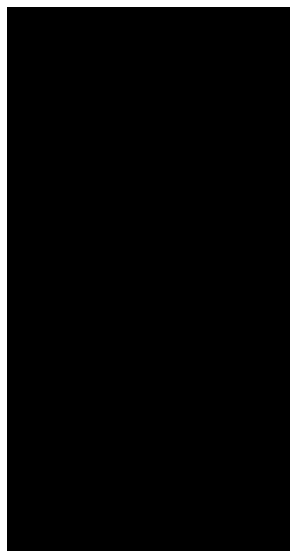

In [31]:
plt.figure(figsize=(10,10))
plt.imshow(predicted, cmap = plt.cm.gray)
plt.axis('off')

In [32]:
from mpl_toolkits.axes_grid1 import make_axes_locatable

epsilon = 1e-15
def show_im(im, ax, title = "", cmap = "jet"):
    im_plt = ax.imshow(im.astype(np.float32), cmap = cmap)
    plt.title(title)
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="5%", pad=0.05)
    plt.colorbar(im_plt, cax=cax) 

def get_mean(pred_probs):
      return np.mean(pred_probs, axis=0)
    
def get_uncertainty_var(pred_probs):
    return np.var(pred_probs, axis=0)
    
def predictive_variance(pred_probs):
    pred_var = get_uncertainty_var(pred_probs)
    pred_var = np.average(pred_var, axis = -1)
#    ic(pred_var.shape)
    return pred_var

def predictive_entropy(pred_probs):
    pred_mean = get_mean(pred_probs) # shape (patch_len, patch_len, class_n)
    uncertainty = np.zeros((pred_mean.shape[0:2]))

    K = pred_mean.shape[-1]
    for k in range(K):
        uncertainty = uncertainty + pred_mean[..., k] * np.log(pred_mean[..., k] + epsilon) 
    uncertainty = - uncertainty / K
    return uncertainty


def single_experiment_entropy(pred_prob):
    uncertainty = np.zeros(pred_prob.shape[0:2])
    ic(uncertainty.shape)
    
    K = pred_prob.shape[-1]
    for k in range(K):
        uncertainty = uncertainty + pred_prob[..., k] * np.log(pred_prob[..., k] + epsilon) 
    uncertainty = - uncertainty / K
    return uncertainty

def mutual_information(pred_probs):
    H = predictive_entropy(pred_probs)
    sum_entropy = 0

    n = pred_probs.shape[0]
    K = pred_probs.shape[-1]
    ic(n, K)

    for i in range(n):
        for k in range(K):
            sum_entropy = sum_entropy + pred_probs[i, ..., k] * np.log(pred_probs[i, ..., k] + epsilon)

    sum_entropy = - sum_entropy / (n * K)

    MI = H - sum_entropy
    return MI

In [33]:
ic(prob_rec.shape)
ic(np.min(prob_rec), np.mean(prob_rec), np.max(prob_rec))


ic| prob_rec.shape: (10, 17760, 9216, 1)
ic| np.min(prob_rec): 0.0
    np.mean(prob_rec): 0.0026485638
    np.max(prob_rec): 1.0


(0.0, 0.0026485638, 1.0)

In [34]:
uncertainty = predictive_entropy(prob_rec).astype(np.float32)
uncertainty_to_show = uncertainty.copy()[:label_mask.shape[0], :label_mask.shape[1]]

uncertainty_to_show[label_mask == 2] = 0



In [35]:
ic(np.min(uncertainty_to_show), np.mean(uncertainty_to_show), np.max(uncertainty_to_show))
ic(np.min(uncertainty), np.mean(uncertainty), np.max(uncertainty))
ic(uncertainty.shape, uncertainty_to_show.shape)

ic| np.min(uncertainty_to_show): 0.0
    np.mean(uncertainty_to_show): 0.005864612
    np.max(uncertainty_to_show): 0.32188758
ic| np.min(uncertainty): 4.0918156e-14
    np.mean(uncertainty): 0.0064296452
    np.max(uncertainty): 0.32188758
ic| uncertainty.shape: (17760, 9216)
    uncertainty_to_show.shape: (17730, 9200)


((17760, 9216), (17730, 9200))

In [36]:
import utils_v1
label_mask_test = label_mask[mask_amazon_ts == 1]
uncertainty_test = utils_v1.excludeBackgroundAreasFromTest(
        utils_v1.getTestVectorFromIm(
                utils_v1.unpadIm(uncertainty, npad), mask_amazon_ts),
        label_mask_test)


In [37]:
ic(np.min(uncertainty_test), np.mean(uncertainty_test), np.max(uncertainty_test))

ic| np.min(uncertainty_test): 5.398061e-10
    np.mean(uncertainty_test): 0.007542192
    np.max(uncertainty_test): 0.32188758


(5.398061e-10, 0.007542192, 0.32188758)

In [38]:
importlib.reload(_metrics)


uncertainty_thresholded = np.zeros_like(uncertainty_test).astype(np.int8)
uncertainty_thresholded[uncertainty_test >= threshold_uncertainty] = 1
uncertainty_thresholded = uncertainty_thresholded.astype(np.uint8)
ic(uncertainty_thresholded.shape)


ic| uncertainty_thresholded.shape: (54236371,)


(54236371,)

In [39]:
ic(np.unique(uncertainty_thresholded, return_counts=True),
    np.unique(label_mask, return_counts=True),
    np.unique(mask_amazon_ts, return_counts=True))



ic| np.unique(uncertainty_thresholded, return_counts=True): (array([0, 1], dtype=uint8), array([53229757,  1006614], dtype=int64))
    np.unique(label_mask, return_counts=True): (array([0, 1, 2], dtype=uint8),
                                                array([100903598,   1838508,  60373894], dtype=int64))
    np.unique(mask_amazon_ts, return_counts=True): (array([0, 1], dtype=uint8), array([81558000, 81558000], dtype=int64))


((array([0, 1], dtype=uint8), array([53229757,  1006614], dtype=int64)),
 (array([0, 1, 2], dtype=uint8),
  array([100903598,   1838508,  60373894], dtype=int64)),
 (array([0, 1], dtype=uint8), array([81558000, 81558000], dtype=int64)))

In [40]:
def getUncertaintyPercentageFromTest(uncertainty_mask, 
        label_mask, mask_test):
    # total_test_area = mask_test.copy()
    # total_test_area[label_mask == 2] = 0
    total_test_area = mask_test[label_mask != 2] 
    total_test_area = total_test_area[total_test_area == 1]
    ic(uncertainty_mask.flatten().shape, total_test_area.shape)
    percentage = np.count_nonzero(uncertainty_mask.flatten()) / len(total_test_area.flatten())
    return total_test_area, percentage

ic(uncertainty_thresholded.shape, label_mask.shape, mask_amazon_ts.shape, label_mask.flatten().shape)
total_test_area, percentage = getUncertaintyPercentageFromTest(uncertainty_thresholded, 
        label_mask, mask_amazon_ts)

ic(percentage)

ic| uncertainty_thresholded.shape: (54236371,)
    label_mask.shape: (17730, 9200)
    mask_amazon_ts.shape: (17730, 9200)
    label_mask.flatten().shape: (163116000,)
ic| uncertainty_mask.flatten().shape: (54236371,)
    total_test_area.shape: (54236371,)
ic| percentage: 0.018559759464732623


0.018559759464732623

In [41]:

uncertainty_unpad = utils_v1.unpadIm(uncertainty, npad)
ic(uncertainty_unpad.shape)



uncertainty_mask = np.zeros_like(uncertainty_unpad).astype(np.int8)
uncertainty_mask[uncertainty_unpad >= threshold_uncertainty] = 1

ignoreSmallPolygons = False
if ignoreSmallPolygons == True:
    min_polygon_area = 625 # pixels
    ic(np.unique(uncertainty_mask, return_counts=True))

    uncertainty_mask_without_small_polygons = skimage.morphology.area_opening(uncertainty_mask, 
        area_threshold = min_polygon_area, connectivity=1)

    
ic(np.unique(uncertainty_mask, return_counts=True))



ic| uncertainty_unpad.shape: (17730, 9200)
ic| np.unique(uncertainty_mask, return_counts=True): (array([0, 1], dtype=int8), array([160406260,   2709740], dtype=int64))


(array([0, 1], dtype=int8), array([160406260,   2709740], dtype=int64))

In [42]:
# cv2.imwrite("uncertainty_mask_without_small_polygons.png", uncertainty_mask_without_small_polygons*255)
# cv2.imwrite("uncertainty_mask.png", uncertainty_mask*255)


In [43]:
# ic(np.min(image_stack[...,[13,12,11]]), np.mean(image_stack[...,[13,12,11]]), np.max(image_stack[...,[13,12,11]]))


In [44]:
# plt.figure(figsize=(10,10))
# plt.imshow(image_stack[...,[13,12,11]])
# plt.axis('off')



In [45]:
# cv2.imwrite("MT_sentinel2_t0_rgb.png", image_stack[...,[3,2,1]])
## cv2.imwrite("MT_sentinel2_t0_rgb.png", (image_stack[...,[3,2,1]]*255).astype(np.uint8))
# cv2.imwrite("MT_sentinel2_t1_rgb.png", (image_stack[...,[13,12,11]]*255).astype(np.uint8))


In [46]:
# cv2.imwrite("MT_sentinel2_t0_rgb.png", (image_stack[...,[3,2,1]]*255).astype(np.uint8))

In [47]:
ic(uncertainty_unpad.shape, label_mask.shape)

ic| uncertainty_unpad.shape: (17730, 9200)
    label_mask.shape: (17730, 9200)


((17730, 9200), (17730, 9200))

In [48]:
'''
def getUncertaintyMask(uncertainty):

    uncertainty_mask = np.zeros_like(uncertainty).astype(np.uint8)
    uncertainty_mask[uncertainty >= 0.15] = 1
    return uncertainty_mask
def maskOutPastDeforestation(uncertainty_mask, label_mask):
    uncertainty_mask[label_mask == 2] = 0
    return uncertainty_mask

uncertainty_mask = getUncertaintyMask(uncertainty_unpad)
uncertainty_mask = maskOutPastDeforestation(uncertainty_mask, label_mask)
ic(np.unique(uncertainty_mask, return_counts=True))
'''

'\ndef getUncertaintyMask(uncertainty):\n\n    uncertainty_mask = np.zeros_like(uncertainty).astype(np.uint8)\n    uncertainty_mask[uncertainty >= 0.15] = 1\n    return uncertainty_mask\ndef maskOutPastDeforestation(uncertainty_mask, label_mask):\n    uncertainty_mask[label_mask == 2] = 0\n    return uncertainty_mask\n\nuncertainty_mask = getUncertaintyMask(uncertainty_unpad)\nuncertainty_mask = maskOutPastDeforestation(uncertainty_mask, label_mask)\nic(np.unique(uncertainty_mask, return_counts=True))\n'

In [49]:
'''
uncertainty_mask_test = uncertainty_mask[mask_amazon_ts==1]
label_test = label_mask[mask_amazon_ts==1]

uncertainty_mask_test = uncertainty_mask_test[label_test!=2]

ic(uncertainty_mask_test.shape)
'''

'\nuncertainty_mask_test = uncertainty_mask[mask_amazon_ts==1]\nlabel_test = label_mask[mask_amazon_ts==1]\n\nuncertainty_mask_test = uncertainty_mask_test[label_test!=2]\n\nic(uncertainty_mask_test.shape)\n'

In [50]:
prob_rec.shape

(10, 17760, 9216, 1)

(-0.5, 9215.5, 17759.5, -0.5)

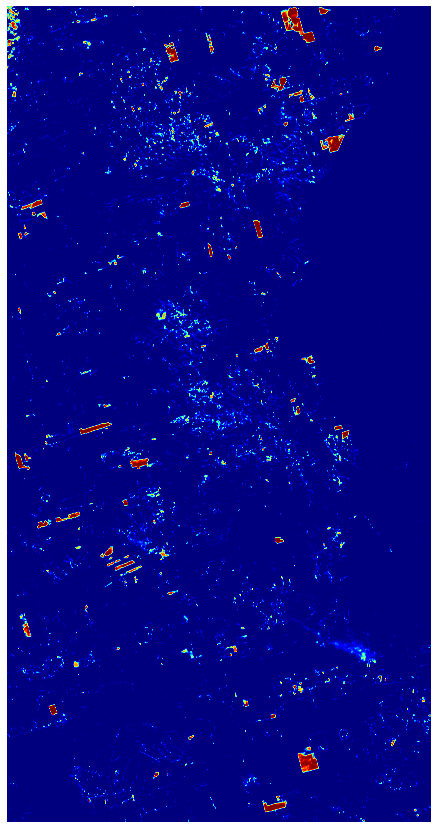

In [51]:
fig, ax = plt.subplots(figsize=(15,15))
ax.set_xticks([])
ax.set_yticks([])
ax.imshow(uncertainty, cmap='jet')
plt.axis('off')


In [52]:
np.mean(uncertainty)

0.0064296452

In [53]:
# mean_prob.shape
uncertainty[:label_mask.shape[0], :label_mask.shape[1]].shape

(17730, 9200)

In [54]:
ic(np.min(uncertainty), np.mean(uncertainty), np.max(uncertainty))


ic| np.min(uncertainty): 4.0918156e-14
    np.mean(uncertainty): 0.0064296452
    np.max(uncertainty): 0.32188758


(4.0918156e-14, 0.0064296452, 0.32188758)

In [55]:
predicted = np.zeros_like(mean_prob).astype(np.uint8)
threshold = 0.5
predicted[mean_prob>=threshold] = 1



min_polygon_area = 625
predicted_without_small_polygons = skimage.morphology.area_opening(predicted, 
        area_threshold = min_polygon_area, connectivity=1)

predicted_small_polygons = predicted - predicted_without_small_polygons


In [56]:
# predicted_unpad = predicted.copy()
predicted_unpad = predicted_without_small_polygons.copy()

predicted_unpad[label_mask == 2] = 0


In [57]:
uncertainty_to_show[predicted_small_polygons == 1] = 0
ic(uncertainty_to_show.shape)

ic| uncertainty_to_show.shape: (17730, 9200)


(17730, 9200)

(-0.5, 9199.5, 17729.5, -0.5)

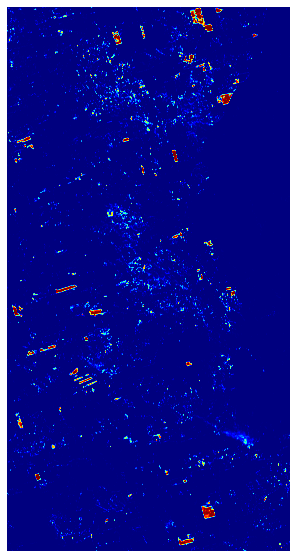

In [58]:
fig, ax = plt.subplots(figsize=(10,10))
ax.set_xticks([])
ax.set_yticks([])
ax.imshow(uncertainty_to_show, cmap='jet')
plt.axis('off')


In [59]:
ic(np.min(uncertainty_to_show), np.mean(uncertainty_to_show), np.max(uncertainty_to_show))

ic| np.min(uncertainty_to_show): 0.0
    np.mean(uncertainty_to_show): 0.005864612
    np.max(uncertainty_to_show): 0.32188758


(0.0, 0.005864612, 0.32188758)

In [60]:

georreferenced_save = True

In [61]:
import utils_v1
import rasterio

if georreferenced_save == True:
    # georref_im = utils_v1.load_tiff_image('D:/Jorge/datasets/sentinel2/MT_2019/S2_R1_MT_2019_08_02_2019_08_05_B3_B4.tif')
    georref_im = utils_v1.load_tiff_image('D:/Jorge/datasets/sentinel2/Para_2018/COPERNICUS_S2_20180721_20180726_B4_B5_B6.tif')


    

D:/Jorge/datasets/sentinel2/Para_2018/COPERNICUS_S2_20180721_20180726_B4_B5_B6.tif


In [62]:
if georreferenced_save == True:
    georref_im.shape

In [63]:
ic(uncertainty_unpad.shape, uncertainty.shape)
ic(predicted.shape, label_mask.shape)

ic| uncertainty_unpad.shape: (17730, 9200)
    uncertainty.shape: (17760, 9216)
ic| predicted.shape: (17730, 9200), label_mask.shape: (17730, 9200)


((17730, 9200), (17730, 9200))

In [64]:
prediced_to_show = predicted.copy()
prediced_to_show[label_mask == 2] = 0

label_mask_current_deforestation = label_mask.copy()
label_mask_current_deforestation[label_mask_current_deforestation==2] = 0

false_positive_mask = prediced_to_show - label_mask_current_deforestation
false_positive_mask = (false_positive_mask + 1).astype(np.int8)
ic(np.unique(false_positive_mask, return_counts=True))

ic| np.unique(false_positive_mask, return_counts=True): (array([0, 1], dtype=int8), array([  1838508, 161277492], dtype=int64))


(array([0, 1], dtype=int8), array([  1838508, 161277492], dtype=int64))

In [65]:
# test metrics
from sklearn.metrics import f1_score

predicted_test = predicted_unpad[mask_amazon_ts == 1]
label_mask_current_deforestation_test = label_mask_current_deforestation[mask_amazon_ts == 1]
label_mask_test = label_mask[mask_amazon_ts == 1]
mean_prob_test = mean_prob[mask_amazon_ts == 1]

ic(predicted_test.shape)

predicted_test = utils_v1.excludeBackgroundAreasFromTest(
        predicted_test, label_mask_test)
label_mask_current_deforestation_test = utils_v1.excludeBackgroundAreasFromTest(
        label_mask_current_deforestation_test, label_mask_test)
mean_prob_test = utils_v1.excludeBackgroundAreasFromTest(
        mean_prob_test, label_mask_test)

ic(predicted_test.shape)


ic| predicted_test.shape: (81558000,)
ic| predicted_test.shape: (54236371,)


(54236371,)

In [66]:
if georreferenced_save == True:
    # original_im_path = 'D:/Jorge/datasets/sentinel2/MT_2019/S2_R1_MT_2019_08_02_2019_08_05_B3_B4.tif'
    original_im_path = 'D:/Jorge/datasets/sentinel2/Para_2018/COPERNICUS_S2_20180721_20180726_B4_B5_B6.tif'

In [67]:
visual_roi_mask = np.zeros_like(false_positive_mask)

# MT 
# previewLims1 = np.array([11500, 12500, 9000, 10000])
# previewLims2 = np.array([5000, 6000, 9500, 10500])

lims = dataset.previewLims1
visual_roi_mask[lims[0]:lims[1], lims[2]:lims[3]] = 1

lims = dataset.previewLims2
visual_roi_mask[lims[0]:lims[1], lims[2]:lims[3]] = 1


print(visual_roi_mask.shape)
print(np.unique(visual_roi_mask, return_counts=True))

(17730, 9200)
(array([0, 1], dtype=int8), array([161116000,   2000000], dtype=int64))


In [68]:
dataset.previewLims1

array([2200, 3200, 6900, 7900])

In [69]:
dataset.previewLims2

array([ 500, 1500, 3500, 4500])

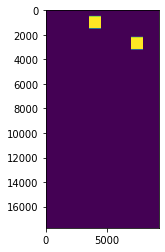

In [70]:
plt.imshow(visual_roi_mask)

## Save georreferenced images

ic| im.shape: (17730, 9200)
ic| im_pad.shape: (17730, 9203)


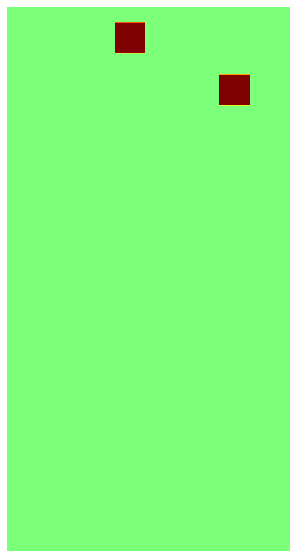

In [71]:
if georreferenced_save == True:

    # visual_roi_mask_pad = rasterTools.padForGeorreferencing(visual_roi_mask)
    visual_roi_mask_pad = rasterTools.padForGeorreferencingPA(visual_roi_mask)


    fig, ax = plt.subplots(figsize=(10,10))
    ax.set_xticks([])
    ax.set_yticks([])
    ax.imshow(visual_roi_mask_pad, cmap='jet')
    plt.axis('off')

    produced_im_path = 'D:/Jorge/deforestation_uncertainty/georreferenced/PA_visual_roi_georreferenced.tif'
    rasterTools.GeoReference_Raster_from_Source_data(original_im_path, 
                    np.expand_dims(visual_roi_mask_pad, axis=0).astype(np.float32), produced_im_path, bands = 1,
                    nodata=-1)

ic| im.shape: (17730, 9200)
ic| im_pad.shape: (17733, 9200)
ic| im_pad.shape: (21733, 12200)
ic| np.min(pred_entropy_to_show_pad): -1.0
    np.mean(pred_entropy_to_show_pad): -0.38119078
    np.max(pred_entropy_to_show_pad): 0.32188758


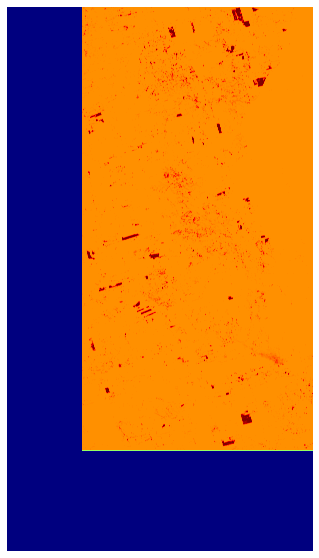

In [72]:
if georreferenced_save == True:

    pred_entropy_to_show_pad = rasterTools.padForGeorreferencing(uncertainty_to_show)

    ic(np.min(pred_entropy_to_show_pad), np.mean(pred_entropy_to_show_pad), np.max(pred_entropy_to_show_pad))

    fig, ax = plt.subplots(figsize=(10,10))
    ax.set_xticks([])
    ax.set_yticks([])
    ax.imshow(pred_entropy_to_show_pad, cmap='jet')
    plt.axis('off')

    produced_im_path = 'D:/Jorge/deforestation_uncertainty/georreferenced/PA_uncertainty_georreferenced.tif'
    rasterTools.GeoReference_Raster_from_Source_data(original_im_path, 
                    np.expand_dims(pred_entropy_to_show_pad, axis=0).astype(np.float32), produced_im_path, bands = 1,
                    nodata=-1)

In [73]:
if georreferenced_save == True:
    produced_im_path = 'D:/Jorge/deforestation_uncertainty/georreferenced/PA_false_positive_mask_georreferenced.tif'
    false_positive_mask_pad = rasterTools.padForGeorreferencing(false_positive_mask, pad_value = 255)
    rasterTools.GeoReference_Raster_from_Source_data(original_im_path, 
                    np.expand_dims(false_positive_mask_pad, axis=0).astype(np.uint8), produced_im_path, bands = 1,
                    nodata=255, dtype = rasterio.uint8)

ic| im.shape: (17730, 9200)
ic| im_pad.shape: (17733, 9200)
ic| im_pad.shape: (21733, 12200)


In [74]:
if georreferenced_save == True:

    label_mask_pad = rasterTools.padForGeorreferencing(label_mask, pad_value = 255)
    label_mask_pad.dtype

    produced_im_path = 'D:/Jorge/deforestation_uncertainty/georreferenced/PA_ground_truth_georreferenced.tif'
    rasterTools.GeoReference_Raster_from_Source_data(original_im_path, 
                    np.expand_dims(label_mask_pad, axis=0).astype(np.uint8), produced_im_path, bands = 1,
                    nodata=255, dtype = rasterio.uint8)

    predicted_pad = rasterTools.padForGeorreferencing(predicted, pad_value = 255)
    predicted_pad.dtype
    predicted_pad[label_mask_pad == 2] = 2

    ic(np.unique(predicted_pad, return_counts=True))

    produced_im_path = 'D:/Jorge/deforestation_uncertainty/georreferenced/PA_predicted_georreferenced.tif'
    rasterTools.GeoReference_Raster_from_Source_data(original_im_path, 
                    np.expand_dims(predicted_pad, axis=0).astype(np.uint8), produced_im_path, bands = 1,
                    nodata=255, dtype = rasterio.uint8)

                

ic| im.shape: (17730, 9200)
ic| im_pad.shape: (17733, 9200)
ic| im_pad.shape: (21733, 12200)
ic| im.shape: (17730, 9200)
ic| im_pad.shape: (17733, 9200)
ic| im_pad.shape: (21733, 12200)
ic| np.unique(predicted_pad, return_counts=True): (array([  0,   2, 255], dtype=uint8),
                                                   array([102742106,  60373894, 102026600], dtype=int64))


In [75]:

if georreferenced_save == True:

    im_t0_pad = rasterTools.padForGeorreferencingChannels(image_stack[...,[3,2,1]])
    im_t0_pad = np.transpose(im_t0_pad, (2, 0, 1))
    print(np.min(image_stack[...,[13,12,11]]), np.mean(image_stack[...,[13,12,11]]), np.max(image_stack[...,[13,12,11]]))


    produced_im_path = 'D:/Jorge/deforestation_uncertainty/georreferenced/PA_sentinel2_2019_rgb_georreferenced.tif'
    rasterTools.GeoReference_Raster_from_Source_data(original_im_path, 
                    im_t0_pad.astype(np.float32), produced_im_path, bands = 3,
                    nodata=-1)

    im_t1_pad = rasterTools.padForGeorreferencingChannels(image_stack[...,[13,12,11]])
    im_t1_pad = np.transpose(im_t1_pad, (2, 0, 1))
    print(im_t1_pad.shape)

    produced_im_path = 'D:/Jorge/deforestation_uncertainty/georreferenced/PA_sentinel2_2020_rgb_georreferenced.tif'
    rasterTools.GeoReference_Raster_from_Source_data(original_im_path, 
                    im_t1_pad.astype(np.float32), produced_im_path, bands = 3,
                    nodata=-1)
    

(17730, 9200, 3)
(17733, 9200, 3)
(21733, 12200, 3)
0.0 0.26890388 1.0000001
(17730, 9200, 3)
(17733, 9200, 3)
(21733, 12200, 3)
(3, 21733, 12200)


In [76]:
uncertainty_mask.dtype

dtype('int8')

In [77]:


if georreferenced_save == True:
    uncertainty_mask_pad = rasterTools.padForGeorreferencingChannels(uncertainty_mask)
    uncertainty_mask_pad = np.transpose(uncertainty_mask_pad, (2, 0, 1))

    uncertainty_mask_without_small_polygons_pad = rasterTools.padForGeorreferencingChannels(
        uncertainty_mask_without_small_polygons)
    uncertainty_mask_without_small_polygons_pad = np.transpose(
        uncertainty_mask_without_small_polygons_pad, (2, 0, 1))

(17730, 9200)


ValueError: operands could not be broadcast together with remapped shapes [original->remapped]: (3,2)  and requested shape (2,2)

(-0.5, 9199.5, 17729.5, -0.5)

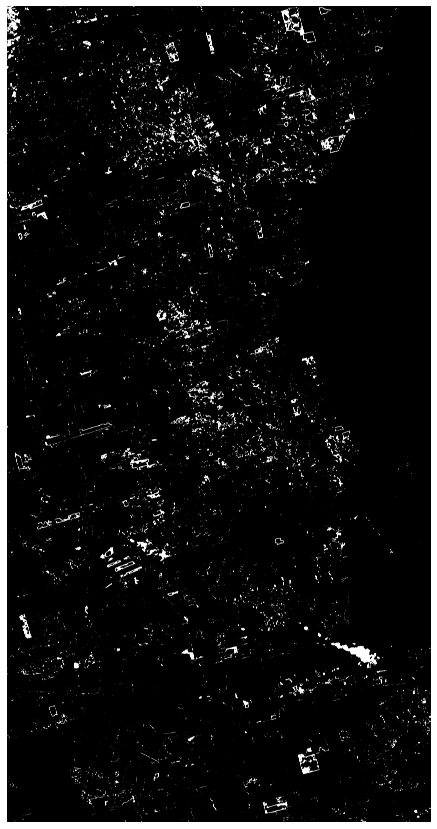

In [ ]:
fig, ax = plt.subplots(figsize=(15,15))
ax.set_xticks([])
ax.set_yticks([])
ax.imshow(uncertainty_mask, cmap=plt.cm.gray)
plt.axis('off')


In [ ]:
pdb.set_trace()

In [ ]:
ic(np.unique(uncertainty_mask, return_counts=True))

ic| np.unique(uncertainty_mask, return_counts=True): (array([0, 1], dtype=int8), array([158748303,   4367697], dtype=int64))


(array([0, 1], dtype=int8), array([158748303,   4367697], dtype=int64))

In [ ]:
# contours, _ = cv2.findContours(uncertainty_mask, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE);

In [ ]:
# len(contours)

In [ ]:
# for con in contours:
#     area = cv2.contourArea(con);
#     print(area)

In [ ]:
connectivity = 4  
num_labels, labels, stats, centroids = cv2.connectedComponentsWithStats(
    uncertainty_mask, connectivity, cv2.CV_32S)


In [ ]:
ic(num_labels)

ic| num_labels: 13720


13720

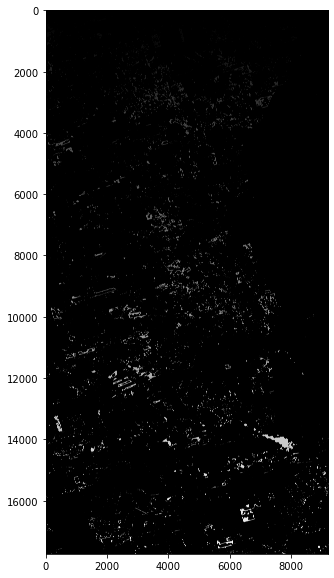

In [ ]:
plt.figure(figsize=(10,10))
plt.imshow(labels, cmap = plt.cm.gray)

In [ ]:
area = stats[1:,-1]

In [ ]:
stats[44:55]

array([[3527,   55,    1,    2,    2],
       [4911,   54,   11,   11,   92],
       [1743,   58,   17,   26,  208],
       [4203,   61,   40,   34,  872],
       [2047,   62,   23,   29,  357],
       [3530,   62,    6,    6,   10],
       [3583,   67,   14,   18,   95],
       [ 375,   77,    4,    2,    7],
       [4913,   76,   22,   30,  387],
       [1699,   79,    3,    2,    4],
       [2221,   79,   10,    4,   20]], dtype=int32)

In [ ]:
ic(np.min(area),np.mean(area),np.max(area))

ic| np.min(area): 1
    np.mean(area): 318.368467089438
    np.max(area): 161475


(1, 318.368467089438, 161475)

In [ ]:
np.argmax(area)

10875

In [ ]:
area.shape

(13719,)

In [ ]:
if issubclass(type(dataset), MT):
    bin_n = 435
    bin_n = 452
    bin_n = 755 # early dates

elif issubclass(type(dataset), PA):
    bin_n = 140
    bin_n = 113
    bin_n = 259 # early dates

bin_n

259

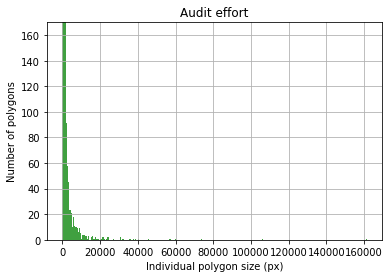

In [ ]:
import matplotlib.pyplot as plt
# bin_n = 450
n, bins, patches = plt.hist(area, bin_n, facecolor='g', alpha=0.75)


plt.xlabel('Individual polygon size (px)')
plt.ylabel('Number of polygons')
plt.title('Audit effort')
# plt.text(60, .025, r'$\mu=100,\ \sigma=15$')
# plt.xlim(-100, 2000)
plt.ylim(0, 170)
plt.grid(True)
plt.show()

In [ ]:
# ic(bins, bins[2]-bins[1], bins[3]-bins[2], bins[4]-bins[3])
bin_size = round(bins[2]-bins[1], 1)
ic(bin_size)

ic| bin_size: 623.5


623.5

In [ ]:
import pdb
def getBinAreaSum(areas, bin_n, bin_size):
    areaSumPerBin = []
    for bin_id in range(bin_n):
        areaSum = 0
        for area in areas:
            if area > bin_size * bin_id and area < bin_size * (bin_id + 1):
                areaSum = areaSum + area
                # print(areaSum)
                # pdb.set_trace()
        areaSumPerBin.append(areaSum)
    return areaSumPerBin
        


areaSumPerBin = getBinAreaSum(area, bin_n, bin_size)    
ic(areaSumPerBin)

ic| areaSumPerBin: [956010,
                    417261,
                    313193,
                    198698,
                    160584,
                    155540,
                    91653,
                    94340,
                    53022,
                    107489,
                    71484,
                    71884,
                    69961,
                    50955,
                    81273,
                    48676,
                    10182,
                    43804,
                    46209,
                    36162,
                    38925,
                    13204,
                    41681,
                    0,
                    30350,
                    47812,
                    16665,
                    17246,
                    36074,
                    18275,
                    19249,
                    0,
                    20333,
                    21172,
                    43106,
                    22369,
                    0,
      

[956010,
 417261,
 313193,
 198698,
 160584,
 155540,
 91653,
 94340,
 53022,
 107489,
 71484,
 71884,
 69961,
 50955,
 81273,
 48676,
 10182,
 43804,
 46209,
 36162,
 38925,
 13204,
 41681,
 0,
 30350,
 47812,
 16665,
 17246,
 36074,
 18275,
 19249,
 0,
 20333,
 21172,
 43106,
 22369,
 0,
 23176,
 48165,
 48980,
 0,
 0,
 0,
 27321,
 0,
 0,
 0,
 0,
 0,
 61166,
 0,
 32072,
 0,
 0,
 0,
 0,
 0,
 35836,
 0,
 0,
 37661,
 0,
 39080,
 0,
 40281,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 45762,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 56896,
 0,
 0,
 0,
 0,
 59918,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 73613,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 106466,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


In [ ]:
bins

array([1.00000000e+00, 6.24451737e+02, 1.24790347e+03, 1.87135521e+03,
       2.49480695e+03, 3.11825869e+03, 3.74171042e+03, 4.36516216e+03,
       4.98861390e+03, 5.61206564e+03, 6.23551737e+03, 6.85896911e+03,
       7.48242085e+03, 8.10587259e+03, 8.72932432e+03, 9.35277606e+03,
       9.97622780e+03, 1.05996795e+04, 1.12231313e+04, 1.18465830e+04,
       1.24700347e+04, 1.30934865e+04, 1.37169382e+04, 1.43403900e+04,
       1.49638417e+04, 1.55872934e+04, 1.62107452e+04, 1.68341969e+04,
       1.74576486e+04, 1.80811004e+04, 1.87045521e+04, 1.93280039e+04,
       1.99514556e+04, 2.05749073e+04, 2.11983591e+04, 2.18218108e+04,
       2.24452625e+04, 2.30687143e+04, 2.36921660e+04, 2.43156178e+04,
       2.49390695e+04, 2.55625212e+04, 2.61859730e+04, 2.68094247e+04,
       2.74328764e+04, 2.80563282e+04, 2.86797799e+04, 2.93032317e+04,
       2.99266834e+04, 3.05501351e+04, 3.11735869e+04, 3.17970386e+04,
       3.24204903e+04, 3.30439421e+04, 3.36673938e+04, 3.42908456e+04,
      

In [ ]:
matplotlib.rcParams.update({'font.size': 16})


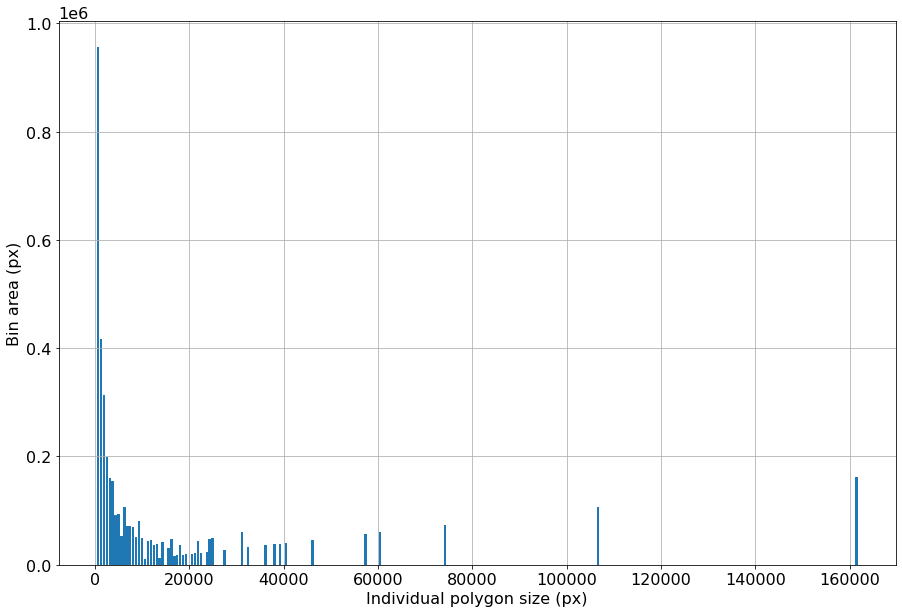

In [ ]:

plt.figure(figsize = (15,10))
width = 500
plt.bar(bins[1:], areaSumPerBin, width)


plt.xlabel('Individual polygon size (px)')
plt.ylabel('Bin area (px)')
# plt.title('Audit effort')
# plt.xlim(-100, 2000)
# plt.ylim(0, 170)
plt.grid(True)
plt.savefig('output/figures/polygon_area_sum_per_bin.png', dpi=150, bbox_inches='tight')

In [ ]:
ic(bins.shape, n.shape)

ic| bins.shape: (260,), n.shape: (259,)


((260,), (259,))

In [ ]:
ic(np.sum(n))

ic(np.sum(n) - n[0])

ic| np.sum(n): 13719.0
ic| np.sum(n) - n[0]: 1058.0


1058.0

In [ ]:
percentage_without_first_bin = 1 - (np.sum(n) - n[0])/np.sum(n)
print(percentage_without_first_bin)

0.9228806764341424


In [ ]:
bins[1:]

array([   624.45173745,   1247.9034749 ,   1871.35521236,   2494.80694981,
         3118.25868726,   3741.71042471,   4365.16216216,   4988.61389961,
         5612.06563707,   6235.51737452,   6858.96911197,   7482.42084942,
         8105.87258687,   8729.32432432,   9352.77606178,   9976.22779923,
        10599.67953668,  11223.13127413,  11846.58301158,  12470.03474903,
        13093.48648649,  13716.93822394,  14340.38996139,  14963.84169884,
        15587.29343629,  16210.74517375,  16834.1969112 ,  17457.64864865,
        18081.1003861 ,  18704.55212355,  19328.003861  ,  19951.45559846,
        20574.90733591,  21198.35907336,  21821.81081081,  22445.26254826,
        23068.71428571,  23692.16602317,  24315.61776062,  24939.06949807,
        25562.52123552,  26185.97297297,  26809.42471042,  27432.87644788,
        28056.32818533,  28679.77992278,  29303.23166023,  29926.68339768,
        30550.13513514,  31173.58687259,  31797.03861004,  32420.49034749,
        33043.94208494,  

In [ ]:
f1 = round(f1_score(label_mask_current_deforestation_test, predicted_test)*100, 2)
print(f1)

79.86


In [ ]:

removePolygons = True
if removePolygons == True:
    # remove polygons smaller than 625 px
    min_polygon_area = 625 # pixels

    predicted_unpad, label_mask = _metrics.removeSmallPolygonsForMetrics(predicted_unpad, label_mask,
        min_polygon_area)
    predicted_masked, label_masked = _metrics.getTest(predicted_unpad, label_mask, mask_amazon_ts)

    predicted_test = predicted_masked
    label_mask_current_deforestation_test = label_masked



ic| np.unique(predicted, return_counts=True): (array([0, 1], dtype=uint8), array([161789622,   1326378], dtype=int64))
    np.unique(predicted_larger_than_min_area, return_counts=True): (array([0, 1], dtype=uint8), array([161789622,   1326378], dtype=int64))
ic| np.unique(ignored_polygons, return_counts=True): (array([0], dtype=uint8), array([163116000], dtype=int64))


In [ ]:
f1 = round(f1_score(label_mask_current_deforestation_test, predicted_test)*100, 2)
print(f1)

79.86


In [ ]:
len(bins[1:])

259

In [ ]:
# max. individual polygon size is <55000
bins[89]

55488.20463320464

In [ ]:

uncertainty_map_thresholded = np.zeros_like(uncertainty).astype(np.int8)
uncertainty_map_thresholded[uncertainty >= threshold_uncertainty] = 1
uncertainty_map_thresholded = uncertainty_map_thresholded.astype(np.uint8)
ic(uncertainty_map_thresholded.shape)


ic| uncertainty_map_thresholded.shape: (17760, 9216)


(17760, 9216)

In [ ]:
# plt.figure(figsize=(15,15))
# plt.imshow(uncertainty_map_thresholded, cmap=plt.cm.gray)

In [ ]:

config = {
	"training": False,
	"save_probabilities": False,
	"loadInference": False,
	"addPastDeforestationInput": True,
	"inference_times": 2
}

import src.trainer.base as t
importlib.reload(t)
trainer = t.Trainer(config, dataset, patchesHandler)


In [ ]:
'''
import pdb
import math
print(np.sum)
f1_values = []

bin = bins[1]

uncertainty_mask = np.zeros_like(uncertainty_unpad).astype(np.int8)
uncertainty_mask[uncertainty_unpad >= threshold_uncertainty] = 1

results = []
# for bin in bins[1:90]:
for idx, bin in enumerate(bins[:10]):

        min_polygon_area = math.ceil(bin)
        print(min_polygon_area)

        # uncertainty_unpad = utils_v1.unpadIm(uncertainty, npad)
        # ic(uncertainty_unpad.shape)




        # min_polygon_area = 625 # pixels
        # ic(np.unique(uncertainty_mask, return_counts=True))
        if idx == 0:
                uncertainty_mask_without_small_polygons = uncertainty_mask.copy()
        else:
                uncertainty_mask_without_small_polygons = skimage.morphology.area_opening(uncertainty_mask, 
                        area_threshold = min_polygon_area, connectivity=1)


        uncertainty_mask_without_small_polygons_test, label_mask_current_deforestation_test_masked = _metrics.getTest(
                uncertainty_mask_without_small_polygons, label_mask, mask_amazon_ts)

        trainer.uncertainty = uncertainty_mask_without_small_polygons_test
        trainer.label_mask_current_deforestation_test = label_mask_current_deforestation_test_masked
        trainer.predicted_test = predicted_test
        trainer.threshold_optimal = threshold_uncertainty
        result = trainer.getUncertaintyMetricsFromOptimalThreshold(get_f1 = False)
        results.append(result)
# ic(uncertainty_mask_without_small_polygons_test.shape)
# ic(label_masked.shape)    
# ic(predicted_test.shape)
# ic(np.unique(uncertainty_mask_without_small_polygons, return_counts=True))

'''

'\nimport pdb\nimport math\nprint(np.sum)\nf1_values = []\n\nbin = bins[1]\n\nuncertainty_mask = np.zeros_like(uncertainty_unpad).astype(np.int8)\nuncertainty_mask[uncertainty_unpad >= threshold_uncertainty] = 1\n\nresults = []\n# for bin in bins[1:90]:\nfor idx, bin in enumerate(bins[:10]):\n\n        min_polygon_area = math.ceil(bin)\n        print(min_polygon_area)\n\n        # uncertainty_unpad = utils_v1.unpadIm(uncertainty, npad)\n        # ic(uncertainty_unpad.shape)\n\n\n\n\n        # min_polygon_area = 625 # pixels\n        # ic(np.unique(uncertainty_mask, return_counts=True))\n        if idx == 0:\n                uncertainty_mask_without_small_polygons = uncertainty_mask.copy()\n        else:\n                uncertainty_mask_without_small_polygons = skimage.morphology.area_opening(uncertainty_mask, \n                        area_threshold = min_polygon_area, connectivity=1)\n\n\n        uncertainty_mask_without_small_polygons_test, label_mask_current_deforestation_test_mask

In [ ]:
np.unique(label_masked, return_counts = True)

(array([0, 1], dtype=uint8), array([53470765,   765606], dtype=int64))

In [ ]:
predicted_test.shape

(54236371,)

In [ ]:
# uncertainty_mask_without_small_polygons.shape

In [ ]:
ic(uncertainty_map_thresholded.shape)
ic(label_mask.shape)
ic(mask_amazon_ts.shape)


ic| uncertainty_map_thresholded.shape: (17760, 9216)
ic| label_mask.shape: (17730, 9200)
ic| mask_amazon_ts.shape: (17730, 9200)


(17730, 9200)

In [ ]:

'''
pdb.set_trace()
trainer.uncertainty = uncertainty
trainer.label_mask_current_deforestation_test = label_mask_current_deforestation_test
trainer.predicted_test = predicted_test



predicted_masked, label_masked = _metrics.getTest(predicted_unpad, label_mask, mask_amazon_ts)

f1 = round(f1_score(label_mask_current_deforestation_test, predicted_test)*100, 2)

f1_values.append(f1)
print(f1)
'''
# predicted_test = predicted_masked
# label_mask_current_deforestation_test = label_masked
    
# pdb.set_trace()


'\npdb.set_trace()\ntrainer.uncertainty = uncertainty\ntrainer.label_mask_current_deforestation_test = label_mask_current_deforestation_test\ntrainer.predicted_test = predicted_test\n\n\n\npredicted_masked, label_masked = _metrics.getTest(predicted_unpad, label_mask, mask_amazon_ts)\n\nf1 = round(f1_score(label_mask_current_deforestation_test, predicted_test)*100, 2)\n\nf1_values.append(f1)\nprint(f1)\n'

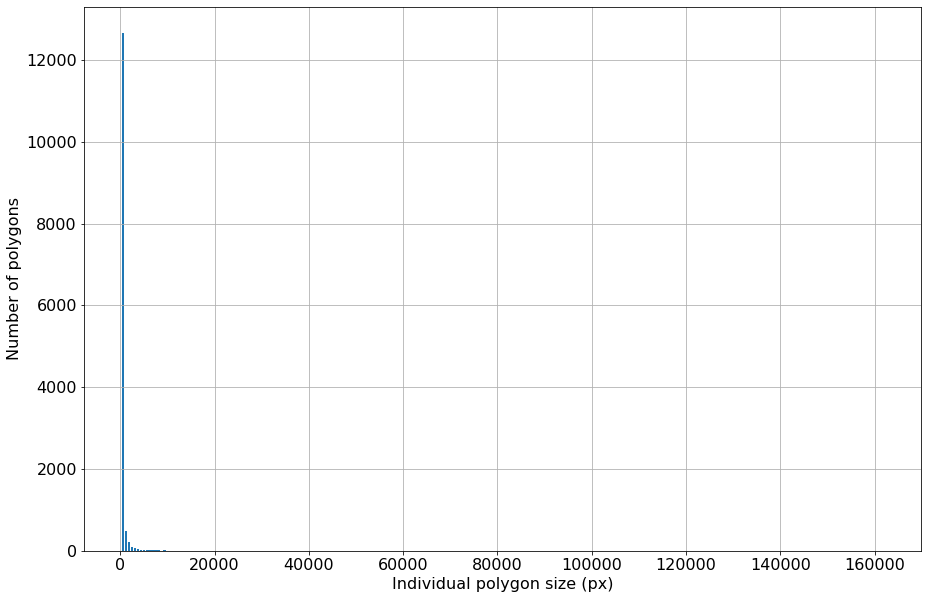

In [ ]:

plt.figure(figsize = (15,10))
plt.bar(bins[1:], n, width)


plt.xlabel('Individual polygon size (px)')
plt.ylabel('Number of polygons')
# plt.title('Audit effort')
# plt.xlim(-100, 2000)
# plt.ylim(0, 170)
plt.grid(True)
plt.savefig('output/figures/polygon_bin_area.png', dpi=150, bbox_inches='tight')

In [ ]:
def getCumulativeArea(areaSumPerBin):
    cumulativeArea = []
    cumulativeSum = 0
    # for areaSum in areaSumPerBin: 
    for areaSum in areaSumPerBin[::-1]:
        cumulativeSum = cumulativeSum + areaSum
        cumulativeArea.append(cumulativeSum)
    # return np.asarray(cumulativeArea) 
    return np.asarray(cumulativeArea)[::-1]



cumulativeArea = getCumulativeArea(areaSumPerBin)
ic(cumulativeArea.shape)

ic| cumulativeArea.shape: (259,)


(259,)

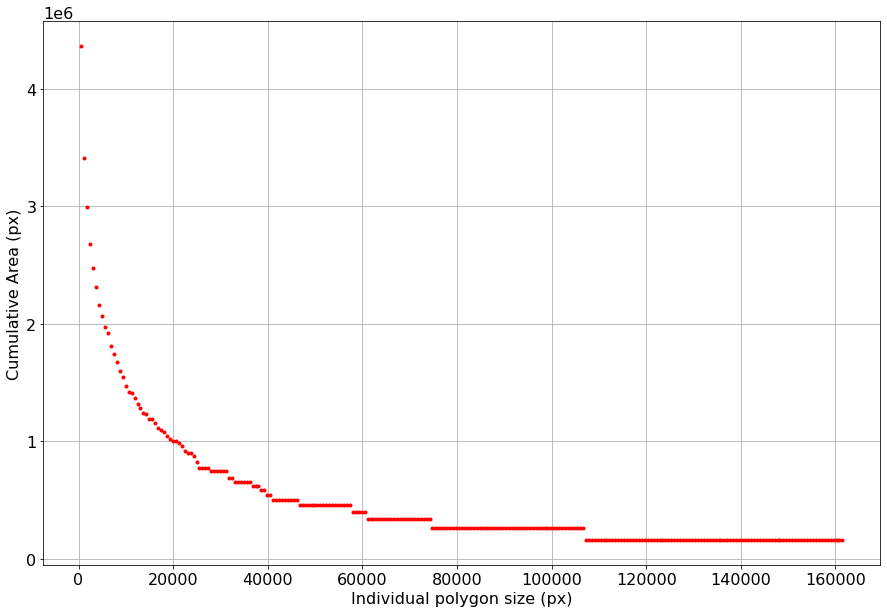

In [ ]:

plt.figure(figsize = (15,10))
plt.plot(bins[1:], cumulativeArea,'r.')


plt.xlabel('Individual polygon size (px)')
plt.ylabel('Cumulative Area (px)')
# plt.title('Audit effort')
# plt.xlim(-100, 2000)
# plt.ylim(0, 170)
plt.grid(True)
plt.savefig('output/figures/polygon_cumulative_area.png', dpi=150, bbox_inches='tight')

In [ ]:
cumulativeArea/cumulativeArea[0]

array([1.        , 0.7808678 , 0.68522517, 0.61343651, 0.56789188,
       0.53108355, 0.49543139, 0.47442312, 0.45279894, 0.44064548,
       0.41600735, 0.39962212, 0.3831452 , 0.36710906, 0.35542939,
       0.33680037, 0.32564308, 0.32330921, 0.31326866, 0.30267685,
       0.29438796, 0.28546575, 0.28243919, 0.27288526, 0.27288526,
       0.26592858, 0.25496933, 0.25114946, 0.24719641, 0.23892769,
       0.23473878, 0.23032662, 0.23032662, 0.22566598, 0.22081303,
       0.21093247, 0.20580515, 0.20580515, 0.20049286, 0.1894527 ,
       0.17822573, 0.17822573, 0.17822573, 0.17822573, 0.17196334,
       0.17196334, 0.17196334, 0.17196334, 0.17196334, 0.17196334,
       0.15794315, 0.15794315, 0.15059175, 0.15059175, 0.15059175,
       0.15059175, 0.15059175, 0.15059175, 0.14237759, 0.14237759,
       0.14237759, 0.13374511, 0.13374511, 0.12478737, 0.12478737,
       0.11555435, 0.11555435, 0.11555435, 0.11555435, 0.11555435,
       0.11555435, 0.11555435, 0.11555435, 0.11555435, 0.10506

<Figure size 1080x720 with 0 Axes>

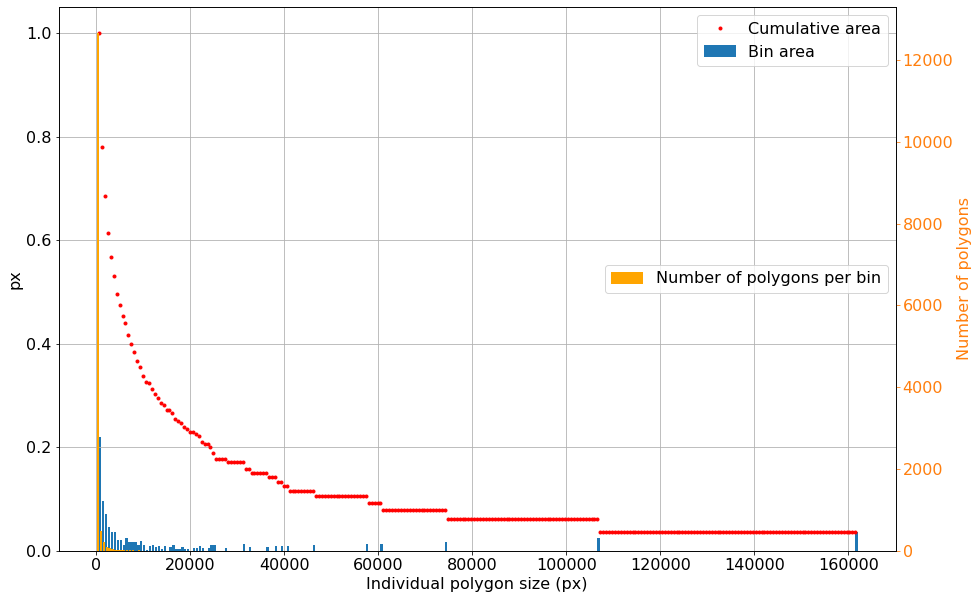

In [ ]:


plt.figure(figsize = (15,10))

# plt.bar(bins[1:], n, width)
# plt.bar(bins[1:] + width, np.asarray(areaSumPerBin)/50, width)

fig, ax1 = plt.subplots()
fig.set_figheight(10)
fig.set_figwidth(15)
ax2 = ax1.twinx()

ax1.bar(bins[1:]+width/2, areaSumPerBin/cumulativeArea[0], width, label = 'Bin area')
ax1.plot(bins[1:], cumulativeArea/cumulativeArea[0],'r.', label = 'Cumulative area')

ax1.set_xlabel('Individual polygon size (px)')
ax1.set_ylabel('px')
ax1.legend(loc = 'upper right')

ax2.bar(bins[1:]-width/2, n, width, color = 'orange', label = 'Number of polygons per bin')
ax2.legend(loc = 'center right')
ax2.set_ylabel('Number of polygons', color="C1")
ax2.tick_params(axis='y', colors='C1')

# plt.title('Audit effort')
# plt.xlim(-100, 2000)
# plt.ylim(0, 170)
ax1.grid(True)
plt.savefig('output/figures/polygon_analysis.png', dpi=150, bbox_inches='tight')

<Figure size 1080x720 with 0 Axes>

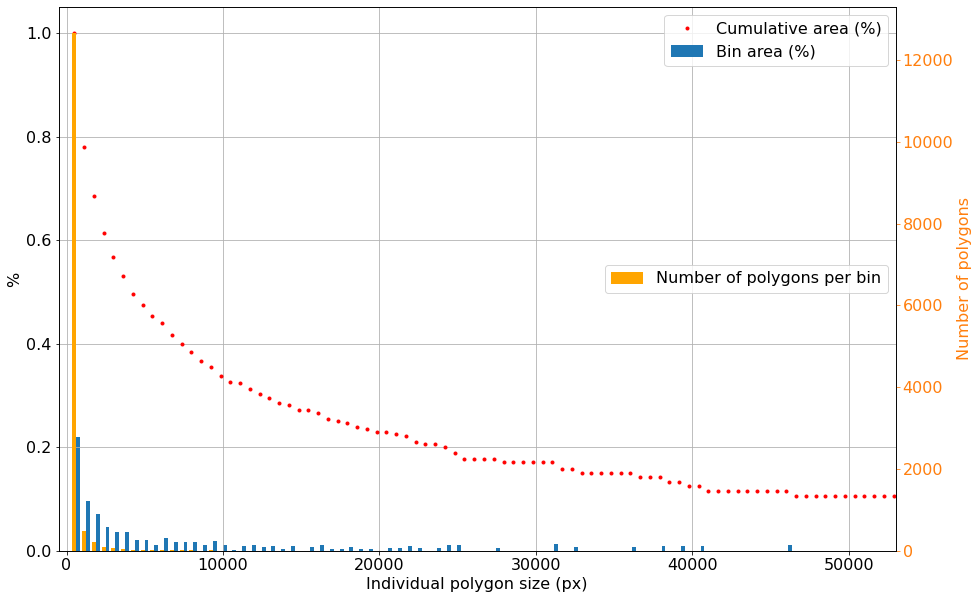

In [ ]:


plt.figure(figsize = (15,10))
width = 250
# plt.bar(bins[1:], n, width)
# plt.bar(bins[1:] + width, np.asarray(areaSumPerBin)/50, width)

fig, ax1 = plt.subplots()
fig.set_figheight(10)
fig.set_figwidth(15)
ax2 = ax1.twinx()

ax1.bar(bins[1:]+width/2, areaSumPerBin/cumulativeArea[0], width, label = 'Bin area (%)')
ax1.plot(bins[1:]-width/2, cumulativeArea/cumulativeArea[0],'r.', label = 'Cumulative area (%)')

ax1.set_xlabel('Individual polygon size (px)')
ax1.set_ylabel('%')
ax1.legend(loc = 'upper right')

ax2.bar(bins[1:]-width/2, n, width, color = 'orange', label = 'Number of polygons per bin')
ax2.legend(loc = 'center right')
ax2.set_ylabel('Number of polygons', color="C1")
ax2.tick_params(axis='y', colors='C1')

ax1.set_xlim([-500, 53000])
ax2.set_xlim([-500, 53000])

# plt.title('Audit effort')
# plt.xlim(-100, 2000)
# plt.ylim(0, 170)
ax1.grid(True)
plt.savefig('output/figures/polygon_analysis_percentage.png', dpi=150, bbox_inches='tight')

<Figure size 1080x360 with 0 Axes>

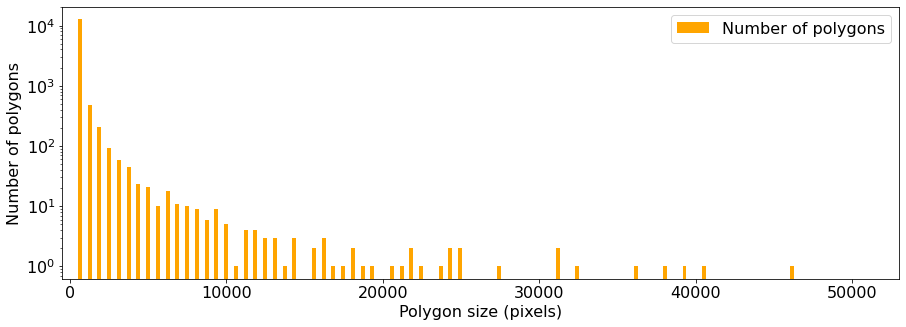

<Figure size 1080x360 with 0 Axes>

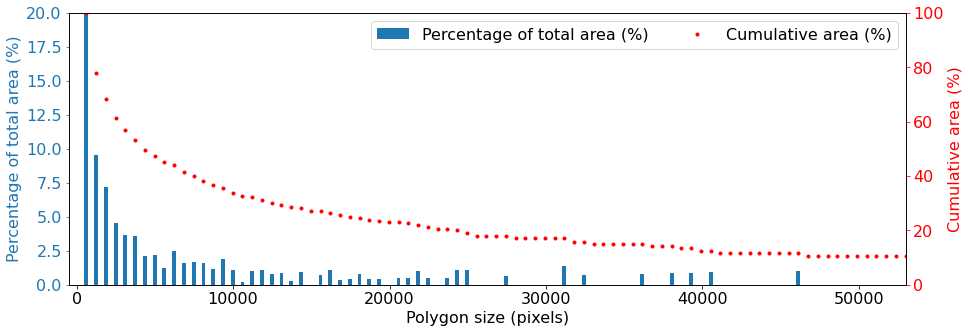

In [ ]:
from matplotlib.ticker import FormatStrFormatter

plt.figure(figsize = (15,5))
width = 250
# plt.bar(bins[1:], n, width)
# plt.bar(bins[1:] + width, np.asarray(areaSumPerBin)/50, width)
# fig, ax1 = plt.subplots()
fig, ax = plt.subplots()
fig.set_figheight(5)
fig.set_figwidth(15)

ax.bar(bins[1:], n, width, color = 'orange', label = 'Number of polygons', log=True)
ax.legend(loc = 'upper right')
ax.set_ylabel('Number of polygons')
ax.set_xlabel('Polygon size (pixels)')
ax.set_xlim([-500, 53000])

plt.savefig('output/figures/polygon_analysis_percentage_split1.png', dpi=150, bbox_inches='tight')

plt.figure(figsize = (15,5))
fig, ax = plt.subplots()
fig.set_figheight(5)
fig.set_figwidth(15)

ax2 = ax.twinx()

ax2.plot(bins[1:], cumulativeArea/cumulativeArea[0]*100,'r.', label = 'Cumulative area (%)')
ax.bar(bins[1:], areaSumPerBin/cumulativeArea[0]*100, width, label = 'Percentage of total area (%)')

# ax.plot(bins[1:], cumulativeArea/cumulativeArea[-1],color='r', linestyle='None', label = 'Cumulative area (%)')

ax.set_xlabel('Polygon size (pixels)')
# ax.legend(loc = 'upper right')
# ax.legend(loc='upper right', bbox_to_anchor=(1.0, 1.0),
#           ncol=2)
# ax.legend(loc='upper right', bbox_to_anchor=(1.0, 0.6),
#           ncol=2)

# added these three lines
# lns = lns1+lns2
# labs = [l.get_label() for l in lns]
# fig.legend(loc='upper right', bbox_to_anchor=(0.9, 0.6),
#           ncol=2)
fig.legend(loc='upper right', bbox_to_anchor=(0.9, 0.88),
          ncol=2)


ax.set_ylabel('Percentage of total area (%)', color="C0")
ax.tick_params(axis='y', colors='C0')
# ax.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
ax2.set_ylabel('Cumulative area (%)', color="r")
ax2.tick_params(axis='y', colors='r', )
# ax2.grid()
          
ax.set_xlim([-500, 53000])

ax.set_ylim([0.0, 20])
ax2.set_ylim([0.0, 100])
plt.savefig('output/figures/polygon_analysis_percentage_split2.png', dpi=150, bbox_inches='tight')

In [ ]:
bins

array([1.00000000e+00, 6.24451737e+02, 1.24790347e+03, 1.87135521e+03,
       2.49480695e+03, 3.11825869e+03, 3.74171042e+03, 4.36516216e+03,
       4.98861390e+03, 5.61206564e+03, 6.23551737e+03, 6.85896911e+03,
       7.48242085e+03, 8.10587259e+03, 8.72932432e+03, 9.35277606e+03,
       9.97622780e+03, 1.05996795e+04, 1.12231313e+04, 1.18465830e+04,
       1.24700347e+04, 1.30934865e+04, 1.37169382e+04, 1.43403900e+04,
       1.49638417e+04, 1.55872934e+04, 1.62107452e+04, 1.68341969e+04,
       1.74576486e+04, 1.80811004e+04, 1.87045521e+04, 1.93280039e+04,
       1.99514556e+04, 2.05749073e+04, 2.11983591e+04, 2.18218108e+04,
       2.24452625e+04, 2.30687143e+04, 2.36921660e+04, 2.43156178e+04,
       2.49390695e+04, 2.55625212e+04, 2.61859730e+04, 2.68094247e+04,
       2.74328764e+04, 2.80563282e+04, 2.86797799e+04, 2.93032317e+04,
       2.99266834e+04, 3.05501351e+04, 3.11735869e+04, 3.17970386e+04,
       3.24204903e+04, 3.30439421e+04, 3.36673938e+04, 3.42908456e+04,
      

In [ ]:
ic(np.sum(n), np.sum(n[1:]), np.sum(n[2:]))


ic| np.sum(n): 13719.0, np.sum(n[1:]): 1058.0, np.sum(n[2:]): 578.0


(13719.0, 1058.0, 578.0)

In [ ]:
ic(labels.shape, label_mask.shape)

ic| labels.shape: (17730, 9200), label_mask.shape: (17730, 9200)


((17730, 9200), (17730, 9200))

(-0.5, 9199.5, 17729.5, -0.5)

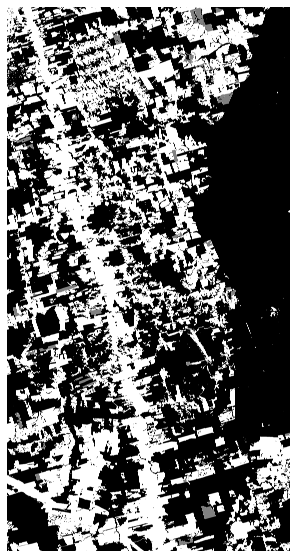

In [ ]:
plt.figure(figsize=(10,10))
plt.imshow(label_mask, cmap=plt.cm.gray)
plt.axis('off')

(-0.5, 9199.5, 17729.5, -0.5)

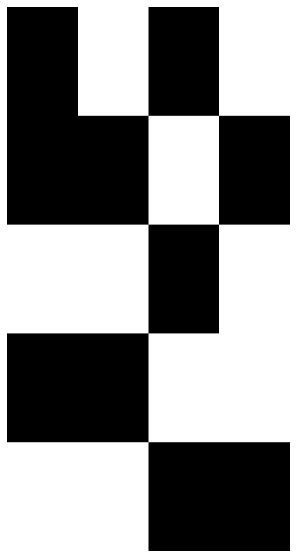

In [ ]:
plt.figure(figsize=(10,10))
plt.imshow(mask_amazon_ts, cmap=plt.cm.gray)
plt.axis('off')


(-0.5, 9199.5, 17729.5, -0.5)

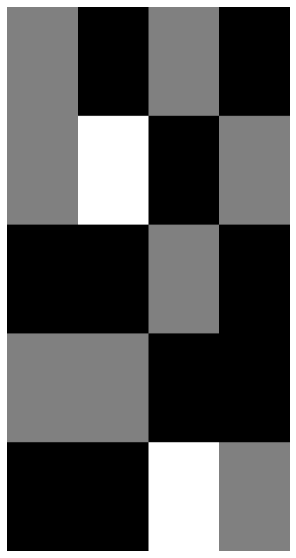

In [ ]:
plt.figure(figsize=(10,10))
plt.imshow(mask_tr_val, cmap=plt.cm.gray)
plt.axis('off')


In [ ]:
label_current_deforestation = label_mask.copy()
label_current_deforestation[label_current_deforestation == 2] = 0
label_current_deforestation = label_current_deforestation.astype(np.bool)

C:\Users\jchamorro\AppData\Local\Temp\ipykernel_11740\2548657025.py:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  label_current_deforestation = label_current_deforestation.astype(np.bool)


In [ ]:
ic(np.unique(uncertainty_mask, return_counts=True),
    np.unique(label_mask, return_counts=True),
    np.unique(mask_amazon_ts, return_counts=True))


ic| np.unique(uncertainty_mask, return_counts=True): (array([0, 1], dtype=int8), array([158748303,   4367697], dtype=int64))
    np.unique(label_mask, return_counts=True): (array([0, 1, 2], dtype=uint8),
                                                array([100903598,   1838508,  60373894], dtype=int64))
    np.unique(mask_amazon_ts, return_counts=True): (array([0, 1], dtype=uint8), array([81558000, 81558000], dtype=int64))


((array([0, 1], dtype=int8), array([158748303,   4367697], dtype=int64)),
 (array([0, 1, 2], dtype=uint8),
  array([100903598,   1838508,  60373894], dtype=int64)),
 (array([0, 1], dtype=uint8), array([81558000, 81558000], dtype=int64)))

In [ ]:
'''
plt.figure(figsize=(10,10))
plt.imshow(total_test_area, cmap=plt.cm.gray)
plt.axis('off')
'''

"\nplt.figure(figsize=(10,10))\nplt.imshow(total_test_area, cmap=plt.cm.gray)\nplt.axis('off')\n"

In [ ]:
def countIntersectingPolygons(labels, deforestation_polygons):
    ic(np.max(labels))
    count_intersecting_polygons = 0

    for polygon_id in range(np.max(labels)):
        if polygon_id % 500 == 0:
            print(polygon_id, count_intersecting_polygons)
        polygon_mask = labels.copy()
        polygon_mask[polygon_mask != polygon_id] = 0
        polygon_mask = polygon_mask.astype(np.bool)

        
        if np.any(polygon_mask & deforestation_polygons):
            count_intersecting_polygons += 1
    return count_intersecting_polygons
countIntersectingPolygonsFlag = False
if countIntersectingPolygonsFlag == True:
    # count_intersecting_polygons = countIntersectingPolygons(labels, label_current_deforestation)
    count_intersecting_polygons = countIntersectingPolygons(labels, predicted.astype(np.bool))

    ic(count_intersecting_polygons)

In [ ]:

if countIntersectingPolygonsFlag == True:
    count_intersecting_polygons/np.max(labels)